In [1]:
import numpy as np
import pandas as pd
import re
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
#    text_to_clean = re.sub(r'[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', '', text_to_fuck)
def clean_input(text_to_clean):
    text_to_clean = text_to_clean.lower()
    text_to_clean = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', '', text_to_clean)
    text_to_clean = re.sub(r'[0-9]+', 'number', text_to_clean)
    text_to_clean = re.sub(r'[^a-zA-Z\u0621-\u064A\s]', '', text_to_clean)
    text_to_clean = re.sub(r'numbernumber+', 'number', text_to_clean)
    return text_to_clean

In [3]:
train=pd.read_csv('Dataset/train.csv')
test=pd.read_csv('Dataset/test.csv')
y_test=pd.read_csv('Dataset/submit.csv')
train=train.fillna(' ')

In [4]:
#Initializ y_train and x_train
train['text_merge'] = train['title'].astype(str) + ' ' + train['author'].astype(str) + ' ' + train['text'].astype(str)
x_train = train['text_merge']
y_train = train.drop(['id','title','author','text','text_merge'],axis=1)
y_train = np.array(y_train)
print(x_train.shape)
print(y_train.shape)


(20800,)
(20800, 1)


In [5]:
#Initializ y_test and x_test
test['text_merge'] = test['title'].astype(str) + ' ' + test['author'].astype(str) + ' ' + test['text'].astype(str)
x_test = test['text_merge']
y_test = y_test.drop(['id'],axis=1)
y_test = np.array(y_test)
x_test

0       Specter of Trump Loosens Tongues, if Not Purse...
1       Russian warships ready to strike terrorists ne...
2       #NoDAPL: Native American Leaders Vow to Stay A...
3       Tim Tebow Will Attempt Another Comeback, This ...
4       Keiser Report: Meme Wars (E995) Truth Broadcas...
                              ...                        
5195    The Bangladeshi Traffic Jam That Never Ends - ...
5196    John Kasich Signs One Abortion Bill in Ohio bu...
5197    California Today: What, Exactly, Is in Your Su...
5198    300 US Marines To Be Deployed To Russian Borde...
5199    Awkward Sex, Onscreen and Off - The New York T...
Name: text_merge, Length: 5200, dtype: object

In [6]:
for i in range(x_train.shape[0]):
    x_train.values[i] = clean_input(x_train[i])

In [7]:
# x_train_list = x_train.tolist()
tokenizer=Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)
word_index=tokenizer.word_index
sequences_train = tokenizer.texts_to_sequences(x_train)
X_train = pad_sequences(sequences_train,maxlen=512,truncating='post',padding='post')
sequences_test = tokenizer.texts_to_sequences(x_test)
X_test = pad_sequences(sequences_test,maxlen=512,padding='post',truncating='post')
# print(sequences_test)
# print(word_index)

print(X_train.shape[1])
print(X_test.shape)


512
(5200, 512)


In [21]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def relu(x):
    return np.maximum(0,x)

In [22]:
#the derivate of te activation function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))
def relu_derivative(x):
    return np.where(x > 0, 1, 0)
def tanh_derivative(x):
    return 1 - np.tanh(x)**2


C:\Users\Eam Kadry\AppData\Local\Temp\ipykernel_19744\3032088681.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 2, Loss: 0.5034448317303285
Accuracy: 49.64%
Iteration 0:
Training Loss: 0.5034448317303285, Training Accuracy: 49.65%
Test Loss: 0.5463461538460332, Test Accuracy: 45.37%
----------------------------------------
Epoch 4, Loss: 0.5038298978723973
Accuracy: 49.60%
Iteration 1:
Training Loss: 0.5038298978723973, Training Accuracy: 49.62%
Test Loss: 0.546730769230551, Test Accuracy: 45.33%
----------------------------------------
Epoch 6, Loss: 0.5033489770208758
Accuracy: 49.64%
Iteration 2:
Training Loss: 0.5033489770208758, Training Accuracy: 49.66%
Test Loss: 0.5473076923073277, Test Accuracy: 45.27%
----------------------------------------
Epoch 8, Loss: 0.5033487106771792
Accuracy: 49.65%
Iteration 3:
Training Loss: 0.5033487106771792, Training Accuracy: 49.66%
Test Loss: 0.5488461538409092, Test Accuracy: 45.12%
----------------------------------------
Epoch 10, Loss: 0.5035415575160936
Accuracy: 49.63%
Iteration 4:
Training Loss: 0.5035415575160936, Training Accuracy: 49.64%

Iteration 37:
Training Loss: 0.5150568127809028, Training Accuracy: 48.49%
Test Loss: 0.5557692307693688, Test Accuracy: 44.42%
----------------------------------------
Epoch 78, Loss: 0.5153454000238067
Accuracy: 48.42%
Iteration 38:
Training Loss: 0.5153454000238067, Training Accuracy: 48.46%
Test Loss: 0.5565353821562773, Test Accuracy: 44.35%
----------------------------------------
Epoch 80, Loss: 0.5164512887607943
Accuracy: 48.31%
Iteration 39:
Training Loss: 0.5164512887607943, Training Accuracy: 48.35%
Test Loss: 0.5582692307692418, Test Accuracy: 44.17%
----------------------------------------
Epoch 82, Loss: 0.5166131089708154
Accuracy: 48.27%
Iteration 40:
Training Loss: 0.5166131089708154, Training Accuracy: 48.33%
Test Loss: 0.5596153846153866, Test Accuracy: 44.04%
----------------------------------------
Epoch 84, Loss: 0.5171046253850762
Accuracy: 48.25%
Iteration 41:
Training Loss: 0.5171046253850762, Training Accuracy: 48.29%
Test Loss: 0.5598076923076927, Test Accur

Epoch 154, Loss: 0.5286939174072571
Accuracy: 47.09%
Iteration 76:
Training Loss: 0.5286939174072571, Training Accuracy: 47.13%
Test Loss: 0.5598076923076923, Test Accuracy: 44.02%
----------------------------------------
Epoch 156, Loss: 0.5293189686268454
Accuracy: 47.00%
Iteration 77:
Training Loss: 0.5293189686268454, Training Accuracy: 47.07%
Test Loss: 0.5601923076923077, Test Accuracy: 43.98%
----------------------------------------
Epoch 158, Loss: 0.5297915731226788
Accuracy: 46.96%
Iteration 78:
Training Loss: 0.5297915731226788, Training Accuracy: 47.02%
Test Loss: 0.5595029645442884, Test Accuracy: 44.04%
----------------------------------------
Epoch 160, Loss: 0.5298959910002892
Accuracy: 46.94%
Iteration 79:
Training Loss: 0.5298959910002892, Training Accuracy: 47.01%
Test Loss: 0.559695272236596, Test Accuracy: 44.02%
----------------------------------------
Epoch 162, Loss: 0.5299440629577664
Accuracy: 46.94%
Iteration 80:
Training Loss: 0.5299440629577664, Training Ac

Epoch 228, Loss: 0.5310888826041636
Accuracy: 46.80%
Iteration 113:
Training Loss: 0.5310888826041636, Training Accuracy: 46.89%
Test Loss: 0.5509858386182822, Test Accuracy: 44.90%
----------------------------------------
Epoch 230, Loss: 0.5309931882723855
Accuracy: 46.82%
Iteration 114:
Training Loss: 0.5309931882723855, Training Accuracy: 46.90%
Test Loss: 0.5509726691194688, Test Accuracy: 44.90%
----------------------------------------
Epoch 232, Loss: 0.5310406776332458
Accuracy: 46.84%
Iteration 115:
Training Loss: 0.5310406776332458, Training Accuracy: 46.89%
Test Loss: 0.5514574501199138, Test Accuracy: 44.85%
----------------------------------------
Epoch 234, Loss: 0.5310894171894923
Accuracy: 46.83%
Iteration 116:
Training Loss: 0.5310894171894923, Training Accuracy: 46.89%
Test Loss: 0.551450341608853, Test Accuracy: 44.85%
----------------------------------------
Epoch 236, Loss: 0.5309452169981986
Accuracy: 46.83%
Iteration 117:
Training Loss: 0.5309452169981986, Traini

Epoch 302, Loss: 0.5280174535464822
Accuracy: 47.12%
Iteration 150:
Training Loss: 0.5280174535464822, Training Accuracy: 47.19%
Test Loss: 0.551362221681078, Test Accuracy: 44.85%
----------------------------------------
Epoch 304, Loss: 0.5276807090586149
Accuracy: 47.16%
Iteration 151:
Training Loss: 0.5276807090586149, Training Accuracy: 47.23%
Test Loss: 0.551746836928536, Test Accuracy: 44.81%
----------------------------------------
Epoch 306, Loss: 0.5276328883441515
Accuracy: 47.16%
Iteration 152:
Training Loss: 0.5276328883441515, Training Accuracy: 47.23%
Test Loss: 0.5511699139869367, Test Accuracy: 44.87%
----------------------------------------
Epoch 308, Loss: 0.5277282979140481
Accuracy: 47.16%
Iteration 153:
Training Loss: 0.5277282979140481, Training Accuracy: 47.22%
Test Loss: 0.5515545269285441, Test Accuracy: 44.83%
----------------------------------------
Epoch 310, Loss: 0.5278252456743144
Accuracy: 47.16%
Iteration 154:
Training Loss: 0.5278252456743144, Trainin

Epoch 378, Loss: 0.5258551956558863
Accuracy: 47.33%
Iteration 188:
Training Loss: 0.5258551956558863, Training Accuracy: 47.40%
Test Loss: 0.5463622216792444, Test Accuracy: 45.35%
----------------------------------------
Epoch 380, Loss: 0.5257826971415822
Accuracy: 47.32%
Iteration 189:
Training Loss: 0.5257826971415822, Training Accuracy: 47.41%
Test Loss: 0.5462498016081482, Test Accuracy: 45.35%
----------------------------------------
Epoch 382, Loss: 0.5258307932597397
Accuracy: 47.29%
Iteration 190:
Training Loss: 0.5258307932597397, Training Accuracy: 47.40%
Test Loss: 0.5463296918424979, Test Accuracy: 45.33%
----------------------------------------
Epoch 384, Loss: 0.5260231200052676
Accuracy: 47.25%
Iteration 191:
Training Loss: 0.5260231200052676, Training Accuracy: 47.38%
Test Loss: 0.5455604584601288, Test Accuracy: 45.40%
----------------------------------------
Epoch 386, Loss: 0.5258308312325126
Accuracy: 47.27%
Iteration 192:
Training Loss: 0.5258308312325126, Train

Epoch 452, Loss: 0.5231688403098333
Accuracy: 47.54%
Iteration 225:
Training Loss: 0.5231688403098333, Training Accuracy: 47.65%
Test Loss: 0.539918470483436, Test Accuracy: 45.92%
----------------------------------------
Epoch 454, Loss: 0.5228323173727951
Accuracy: 47.60%
Iteration 226:
Training Loss: 0.5228323173727951, Training Accuracy: 47.69%
Test Loss: 0.5401107781757436, Test Accuracy: 45.90%
----------------------------------------
Epoch 456, Loss: 0.5229064566856763
Accuracy: 47.60%
Iteration 227:
Training Loss: 0.5229064566856763, Training Accuracy: 47.68%
Test Loss: 0.540110778175852, Test Accuracy: 45.90%
----------------------------------------
Epoch 458, Loss: 0.5227596441402061
Accuracy: 47.56%
Iteration 228:
Training Loss: 0.5227596441402061, Training Accuracy: 47.69%
Test Loss: 0.540495393560359, Test Accuracy: 45.87%
----------------------------------------
Epoch 460, Loss: 0.5226860738609511
Accuracy: 47.60%
Iteration 229:
Training Loss: 0.5226860738609511, Training

Epoch 528, Loss: 0.5185734758643791
Accuracy: 47.87%
Iteration 263:
Training Loss: 0.5185734758643791, Training Accuracy: 48.08%
Test Loss: 0.5342145021531157, Test Accuracy: 46.48%
----------------------------------------
Epoch 530, Loss: 0.518738194056817
Accuracy: 47.84%
Iteration 264:
Training Loss: 0.518738194056817, Training Accuracy: 48.06%
Test Loss: 0.5342937954514804, Test Accuracy: 46.46%
----------------------------------------
Epoch 532, Loss: 0.518179091850393
Accuracy: 47.87%
Iteration 265:
Training Loss: 0.518179091850393, Training Accuracy: 48.11%
Test Loss: 0.5339091800646447, Test Accuracy: 46.50%
----------------------------------------
Epoch 534, Loss: 0.5181650673034139
Accuracy: 47.90%
Iteration 266:
Training Loss: 0.5181650673034139, Training Accuracy: 48.11%
Test Loss: 0.5339334802083548, Test Accuracy: 46.50%
----------------------------------------
Epoch 536, Loss: 0.5178070974886251
Accuracy: 47.93%
Iteration 267:
Training Loss: 0.5178070974886251, Training 

Iteration 300:
Training Loss: 0.5132731994576722, Training Accuracy: 48.52%
Test Loss: 0.5268173020255629, Test Accuracy: 47.10%
----------------------------------------
Epoch 604, Loss: 0.5133473203834648
Accuracy: 48.23%
Iteration 301:
Training Loss: 0.5133473203834648, Training Accuracy: 48.51%
Test Loss: 0.5262403789486398, Test Accuracy: 47.15%
----------------------------------------
Epoch 606, Loss: 0.5131550368332051
Accuracy: 48.20%
Iteration 302:
Training Loss: 0.5131550368332051, Training Accuracy: 48.53%
Test Loss: 0.5262403789486398, Test Accuracy: 47.15%
----------------------------------------
Epoch 608, Loss: 0.5133872985985407
Accuracy: 48.18%
Iteration 303:
Training Loss: 0.5133872985985407, Training Accuracy: 48.50%
Test Loss: 0.5266249943332553, Test Accuracy: 47.12%
----------------------------------------
Epoch 610, Loss: 0.5132010617211699
Accuracy: 48.20%
Iteration 304:
Training Loss: 0.5132010617211699, Training Accuracy: 48.52%
Test Loss: 0.5263202665698512, T

Epoch 678, Loss: 0.5061154988870303
Accuracy: 48.64%
Iteration 338:
Training Loss: 0.5061154988870303, Training Accuracy: 49.13%
Test Loss: 0.51885200545324, Test Accuracy: 47.79%
----------------------------------------
Epoch 680, Loss: 0.506167737810825
Accuracy: 48.64%
Iteration 339:
Training Loss: 0.506167737810825, Training Accuracy: 49.12%
Test Loss: 0.5175301517490847, Test Accuracy: 47.92%
----------------------------------------
Epoch 682, Loss: 0.50600155797128
Accuracy: 48.65%
Iteration 340:
Training Loss: 0.50600155797128, Training Accuracy: 49.13%
Test Loss: 0.5176899269923103, Test Accuracy: 47.88%
----------------------------------------
Epoch 684, Loss: 0.5063269168777055
Accuracy: 48.62%
Iteration 341:
Training Loss: 0.5063269168777055, Training Accuracy: 49.10%
Test Loss: 0.5175219194427528, Test Accuracy: 47.90%
----------------------------------------
Epoch 686, Loss: 0.5064724657171157
Accuracy: 48.59%
Iteration 342:
Training Loss: 0.5064724657171157, Training Accu

Epoch 752, Loss: 0.5039618870783753
Accuracy: 48.49%
Iteration 375:
Training Loss: 0.5039618870783753, Training Accuracy: 49.19%
Test Loss: 0.5123245566885336, Test Accuracy: 48.29%
----------------------------------------
Epoch 754, Loss: 0.5036574791880382
Accuracy: 48.48%
Iteration 376:
Training Loss: 0.5036574791880382, Training Accuracy: 49.22%
Test Loss: 0.5122936806792358, Test Accuracy: 48.27%
----------------------------------------
Epoch 756, Loss: 0.5033738861061654
Accuracy: 48.47%
Iteration 377:
Training Loss: 0.5033738861061654, Training Accuracy: 49.25%
Test Loss: 0.5124558010508498, Test Accuracy: 48.23%
----------------------------------------
Epoch 758, Loss: 0.5030967403582856
Accuracy: 48.51%
Iteration 378:
Training Loss: 0.5030967403582856, Training Accuracy: 49.27%
Test Loss: 0.5126513829203363, Test Accuracy: 48.21%
----------------------------------------
Epoch 760, Loss: 0.502772887324586
Accuracy: 48.52%
Iteration 379:
Training Loss: 0.502772887324586, Trainin

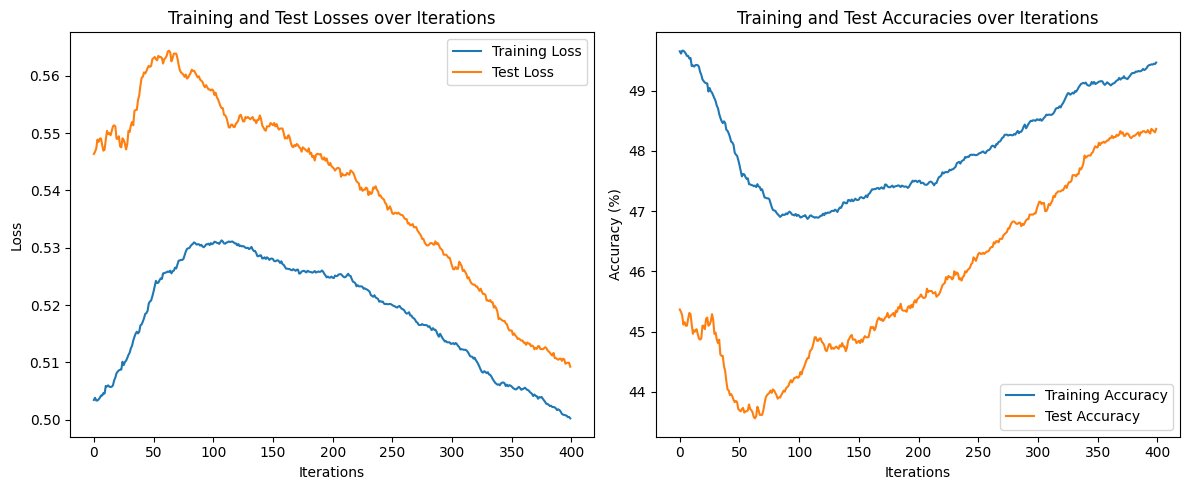

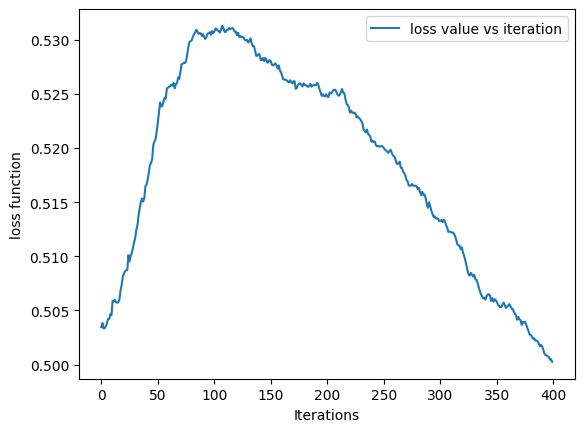

In [53]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class AdamOptimizer:
    def __init__(self,x,hidden1, out_layer ,learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m_w1 = np.zeros([x.shape[1],hidden1])
        self.v_w1 = np.zeros([x.shape[1],hidden1])
        self.m_w2 = np.zeros([hidden1,out_layer])
        self.v_w2 = np.zeros([hidden1,out_layer])
        self.t = 0

    def initialize(self, parameters):
        self.m = np.zeros_like(parameters)
        self.v = np.zeros_like(parameters)

    def update(self, parameters, gradients):
        self.t += 1
        if(parameters.shape==self.m_w1.shape):
            self.m_w1 = self.beta1 * self.m_w1 + (1 - self.beta1) * gradients
            self.v_w1 = self.beta2 * self.v_w1 + (1 - self.beta2) * (gradients ** 2)

            m_hat_w1 = self.m_w1 / (1 - self.beta1 ** self.t)
            v_hat_w1 = self.v_w1 / (1 - self.beta2 ** self.t)
            parameters += self.learning_rate * m_hat_w1 / (np.sqrt(v_hat_w1) + self.epsilon)
        else:
            self.m_w2 = self.beta1 * self.m_w2 + (1 - self.beta1) * gradients
            self.v_w2 = self.beta2 * self.v_w2 + (1 - self.beta2) * (gradients ** 2)

            m_hat_w2 = self.m_w2 / (1 - self.beta1 ** self.t)
            v_hat_w2 = self.v_w2 / (1 - self.beta2 ** self.t)
            parameters += self.learning_rate * m_hat_w2 / (np.sqrt(v_hat_w2) + self.epsilon)

        

        return parameters

def init_weights(num_features, num_neuron):
    weights = np.random.normal(0, 1, size=(num_features, num_neuron))
    return weights

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

class BayesianNeuralNetwork:
    def __init__(self, x, y, hidden1, out_layer, b):
        self.input = x
        self.weights1_prior = init_weights(self.input.shape[1], hidden1)
        self.weights2_prior = init_weights(hidden1, out_layer)
        self.y = y
        self.output = np.zeros(self.y.shape)
        self.loss = []
        self.bias = b
        self.optimizer = AdamOptimizer(x,hidden1,out_layer)

    def feedforward(self):
        self.layer1_out = relu(np.dot(self.input, self.weights1_prior) + self.bias[0]) 
        self.output = sigmoid(np.dot(self.layer1_out, self.weights2_prior) + self.bias[1])

    def backprop(self):
        gradients_w2 = np.dot(self.layer1_out.T, (self.output - self.y))
        gradients_w1 = np.dot(self.input.T, np.dot((self.output - self.y), self.weights2_prior.T) * self.layer1_out * (1 - self.layer1_out))

        # Update weights using Adam optimizer
        self.weights2_prior = self.optimizer.update(self.weights2_prior, gradients_w2)
        self.weights1_prior = self.optimizer.update(self.weights1_prior, gradients_w1)

        # Calculate and print the loss
        cost = mean_squared_error(self.y, self.output)
        self.loss.append(cost)
        print(f"Epoch {self.optimizer.t}, Loss: {cost}")

# Example usage
# Assuming you have X_train, Y_train, initial_weights, and other necessary variables
# ...

# Create an instance of BayesianNeuralNetwork
bias = np.random.normal(0.6,0.05,size=(2,1))
model = BayesianNeuralNetwork(X_train, y_train, 100, 1, bias)
model.loss = []
iterations = []
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
# Training loop
for epoch in range(400):
    # Forward and backward pass
    model.feedforward()
    model.backprop()
    iterations.append(epoch)
    accuracy = np.mean(model.output == y_train)*100
    print(f"Accuracy: {accuracy:.2f}%")
    #print(model.output)
     # Training set evaluation
    train_loss = model.loss[-1]
    train_losses.append(train_loss)
    train_accuracy = np.mean((model.output >= 0.5) == y_train) * 100
    train_accuracies.append(train_accuracy)
    # Test set evaluation
    model.input = X_test
    model.y = y_test
    model.feedforward()
    test_loss = mean_squared_error(model.y , model.output)
    test_losses.append(test_loss)
    test_accuracy = np.mean((model.output >= 0.5) == y_test) * 100
    test_accuracies.append(test_accuracy)
    # Reset input and y for the training set
    model.input = X_train
    model.y = y_train
    print(f'Iteration {epoch}:')
    print(f'Training Loss: {train_loss}, Training Accuracy: {train_accuracy:.2f}%')
    print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy:.2f}%')
    print('-' * 40)

plt.figure(figsize=(12, 5))

# Plot training and test losses
plt.subplot(1, 2, 1)
plt.plot(iterations, train_losses, label='Training Loss')
plt.plot(iterations, test_losses, label='Test Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Test Losses over Iterations')
plt.legend()

# Plot training and test accuracies
plt.subplot(1, 2, 2)
plt.plot(iterations, train_accuracies, label='Training Accuracy')
plt.plot(iterations, test_accuracies, label='Test Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracies over Iterations')
plt.legend()

plt.tight_layout()
plt.show()
plt.plot(iterations, model.loss, label='loss value vs iteration')
plt.xlabel('Iterations')
plt.ylabel('loss function')
plt.legend()
plt.show()